In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [2]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pickle

In [3]:
paths = [ 
    '../rosetta_runs/benchmark/feature_set.csv', 
    '../rosetta_runs/shells/feature_set.csv',
    '../rosetta_runs/ddg_monomer/feature_set.csv', 
    '../rosetta_runs/new_protocol/feature_set.csv', 
    '../foldx_runs/pssm/feature_set.csv', 
    # '../rosetta_runs/homology_models/feature_set.csv', 
]

In [4]:
dat = pandas.read_csv( '../data_sets/experimental/targets.csv', index_col=0 )
#dat.kcat = np.log10( dat.kcat / 880 )
#dat.km = np.log10( dat.km / 5.5 )
#dat.kcatkm = np.log10( dat.kcatkm / 174000 )
#dat = dat.replace( [ np.inf, -np.inf ], -5 )

In [5]:
targets = [ 'kcat', 'km', 'kcatkm', 'tm' ] 

In [6]:
combos = []
for feature_set in paths:
    feats = pandas.read_csv( feature_set, index_col=0 )
    nm = feature_set.split( '/' )[2]
    for target in targets:
        J = dat[[ target ]].join( feats ).dropna()
        scaler = MinMaxScaler()
        X = scaler.fit_transform( J )
        y = J.ix[ : , 0 ].ravel()
        X = X[ : , 1: ] 
        combos.append( ( nm, target, X, y, J.columns[ 1: ] ) )

In [7]:
with open( 'combos.pkl', 'wb' ) as fn:
    pickle.dump( combos, fn ) 

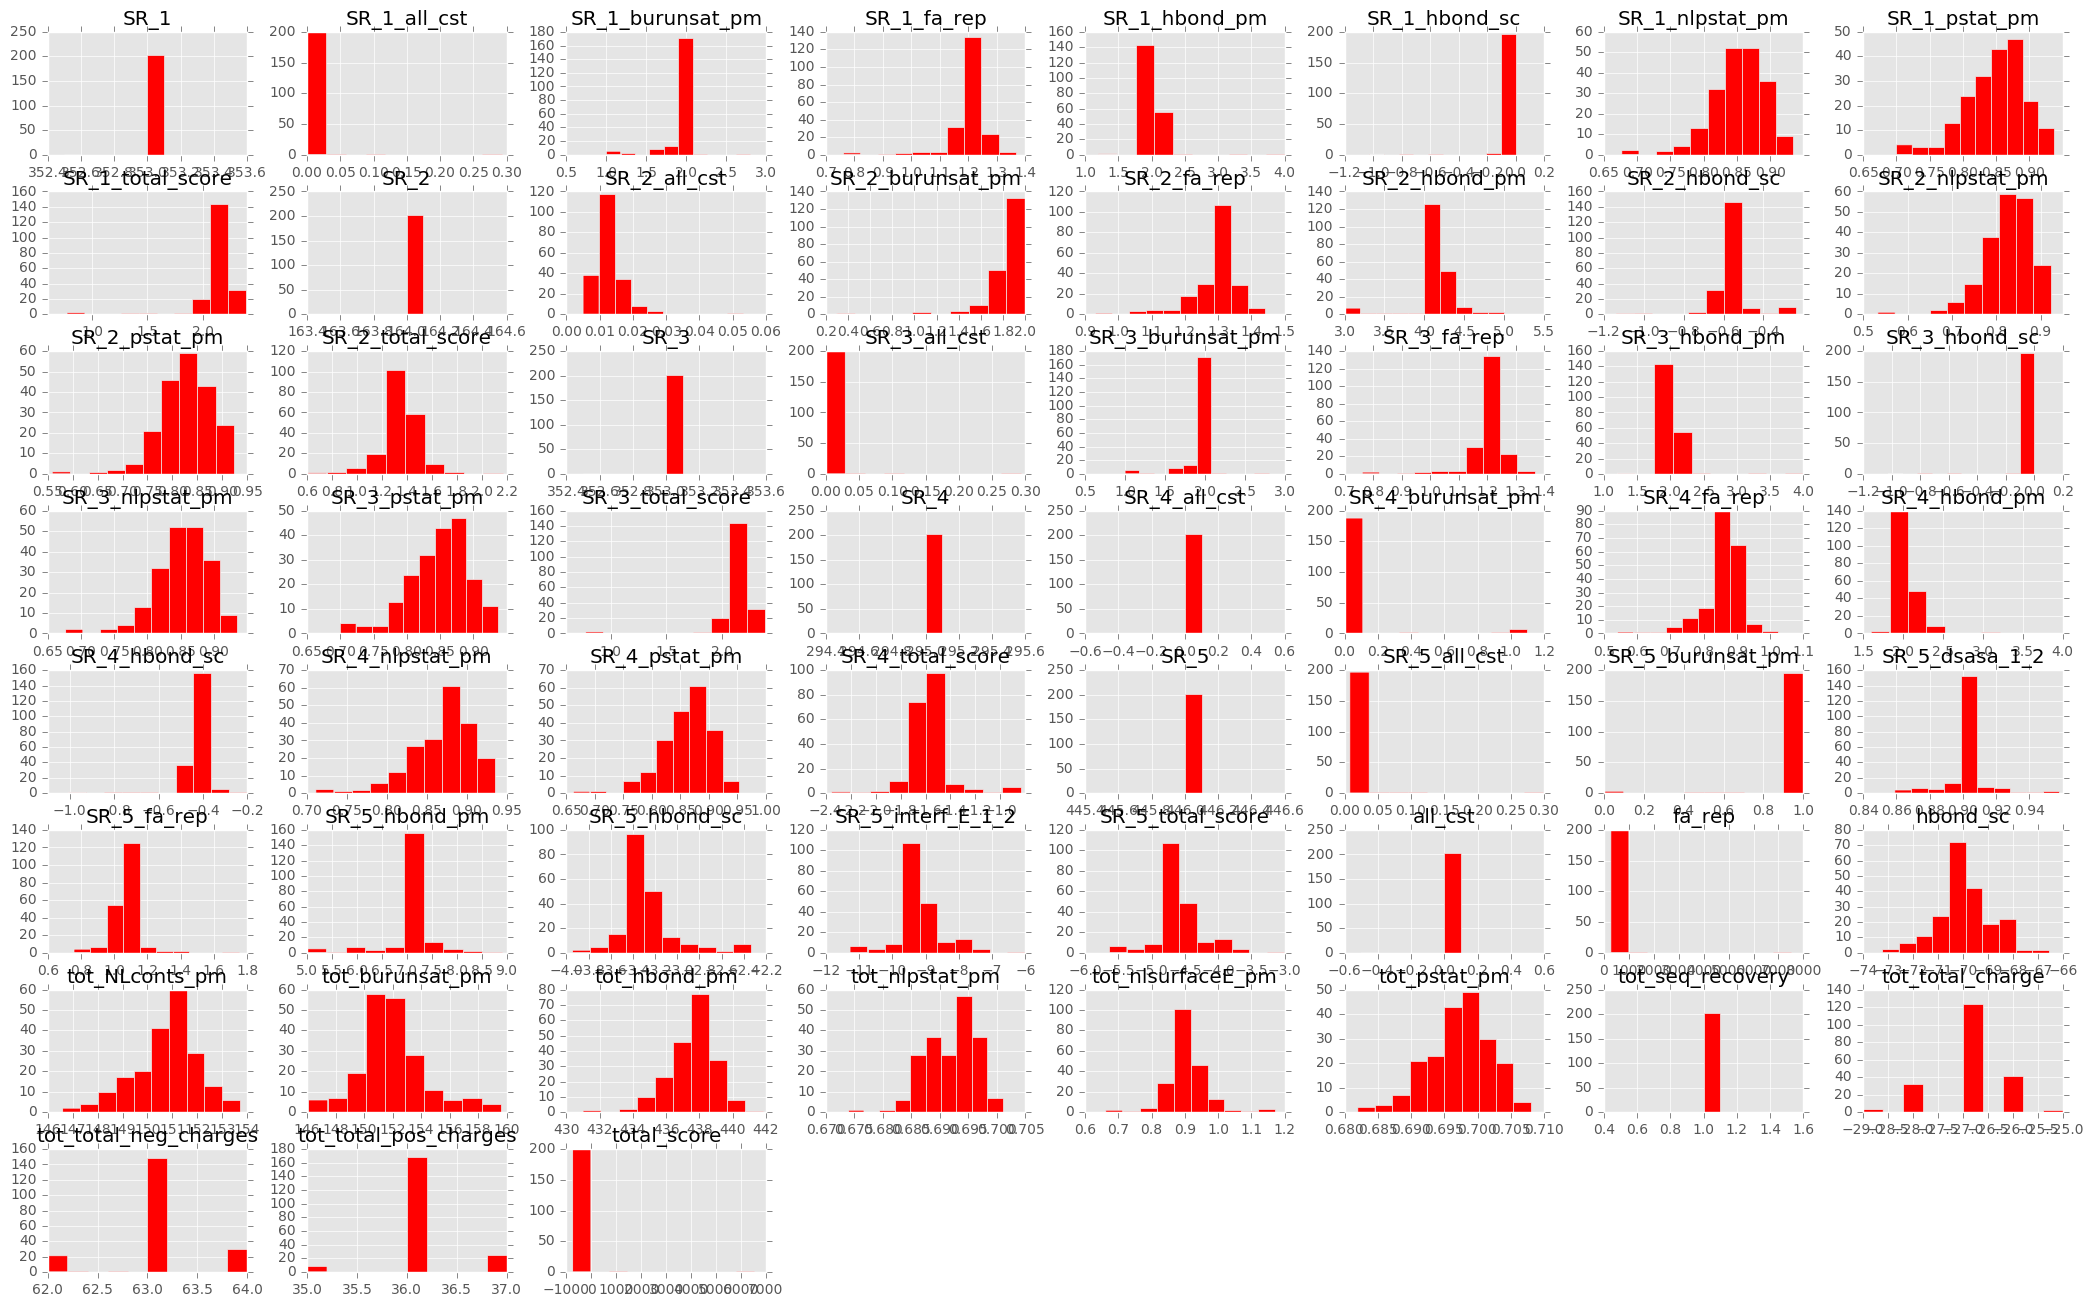

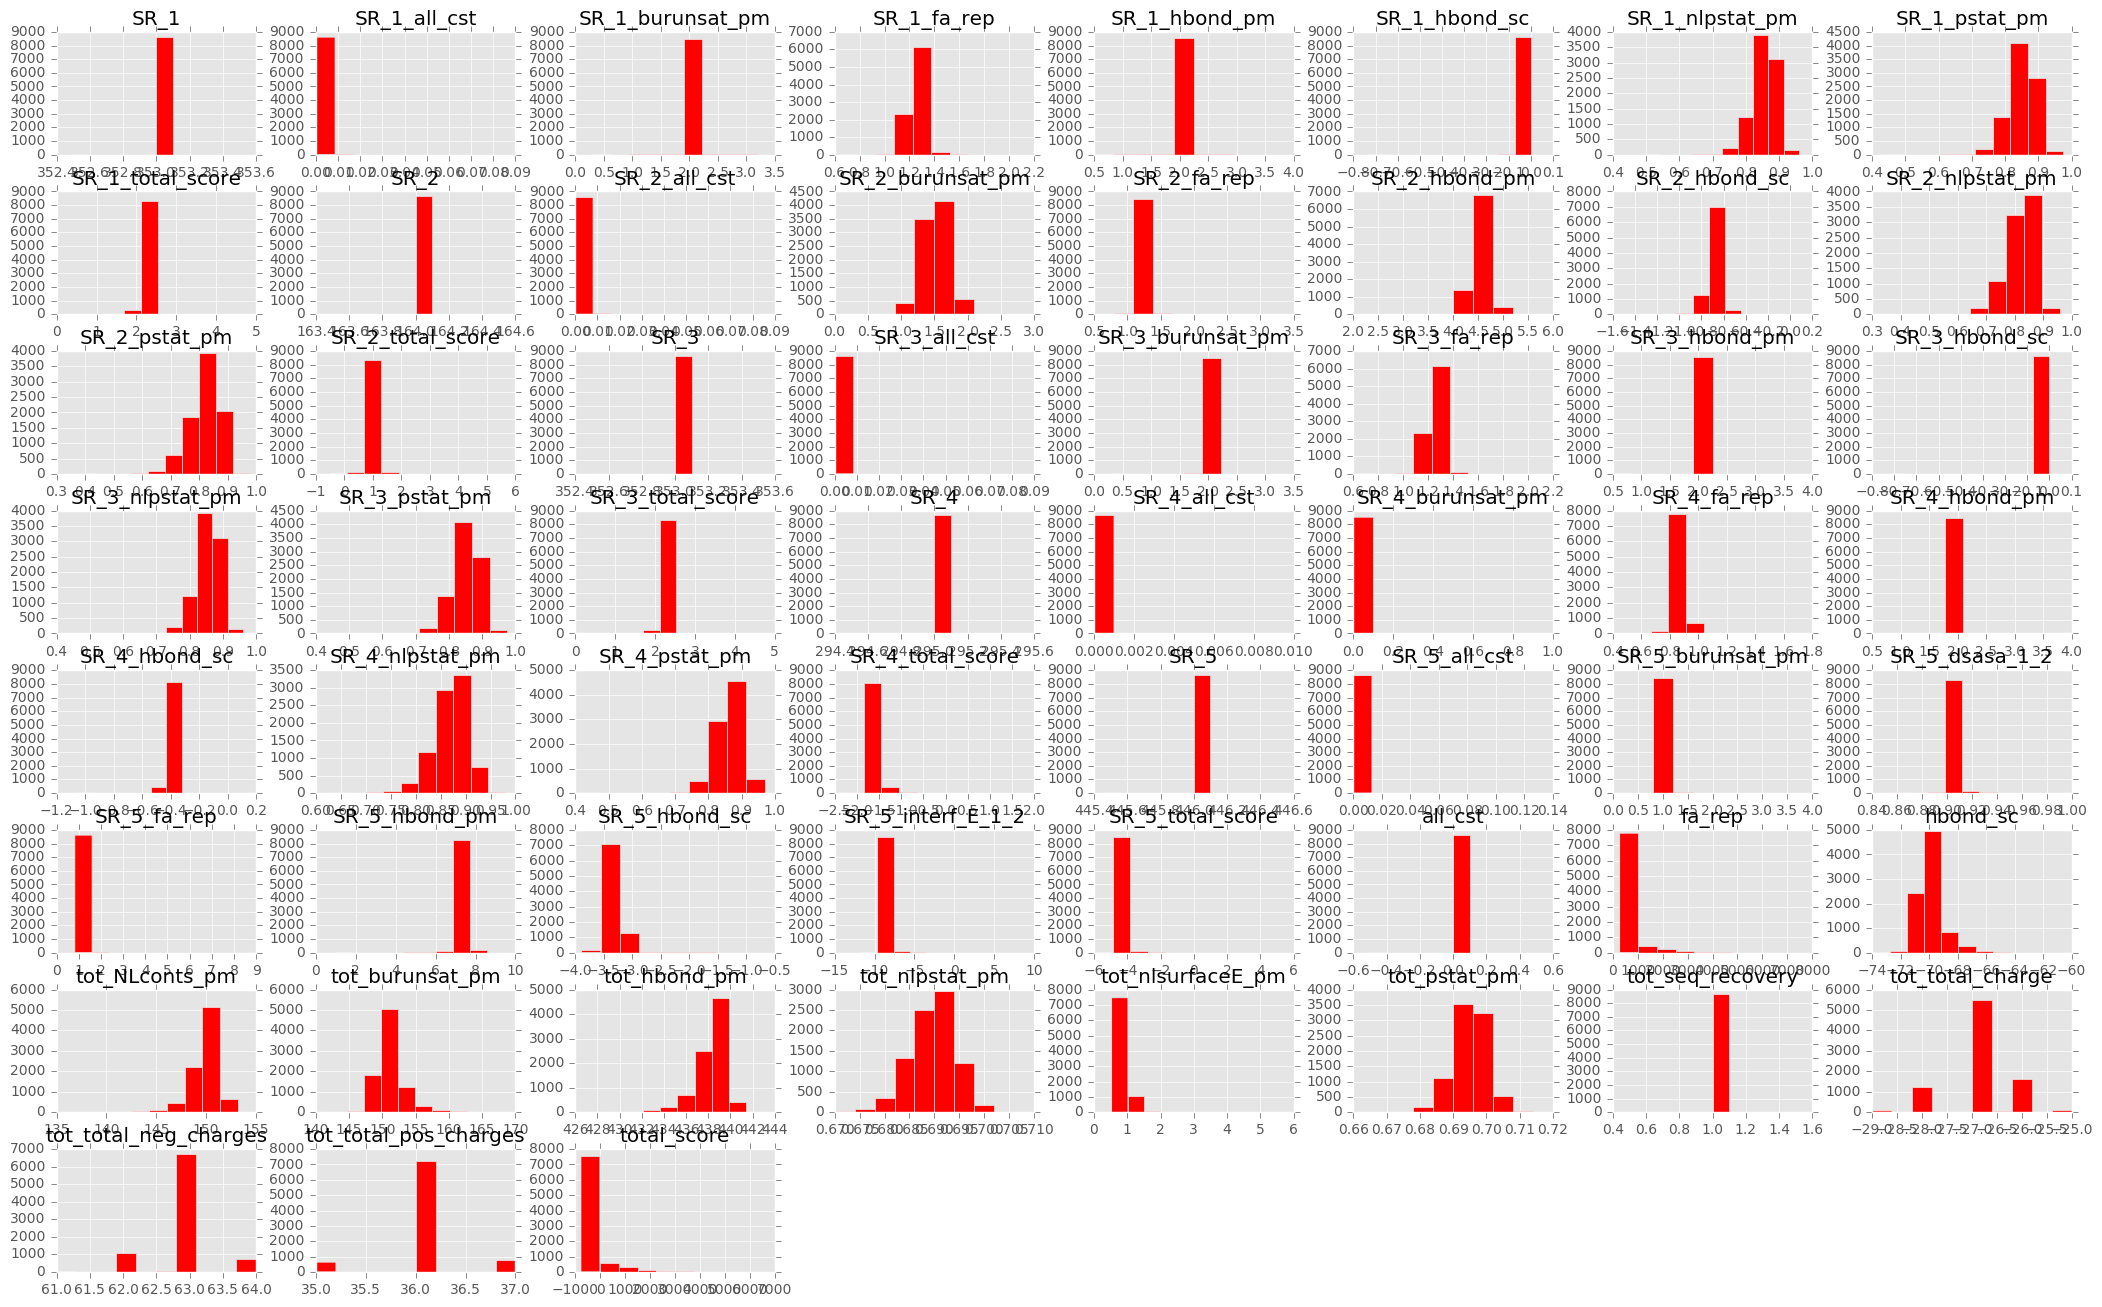

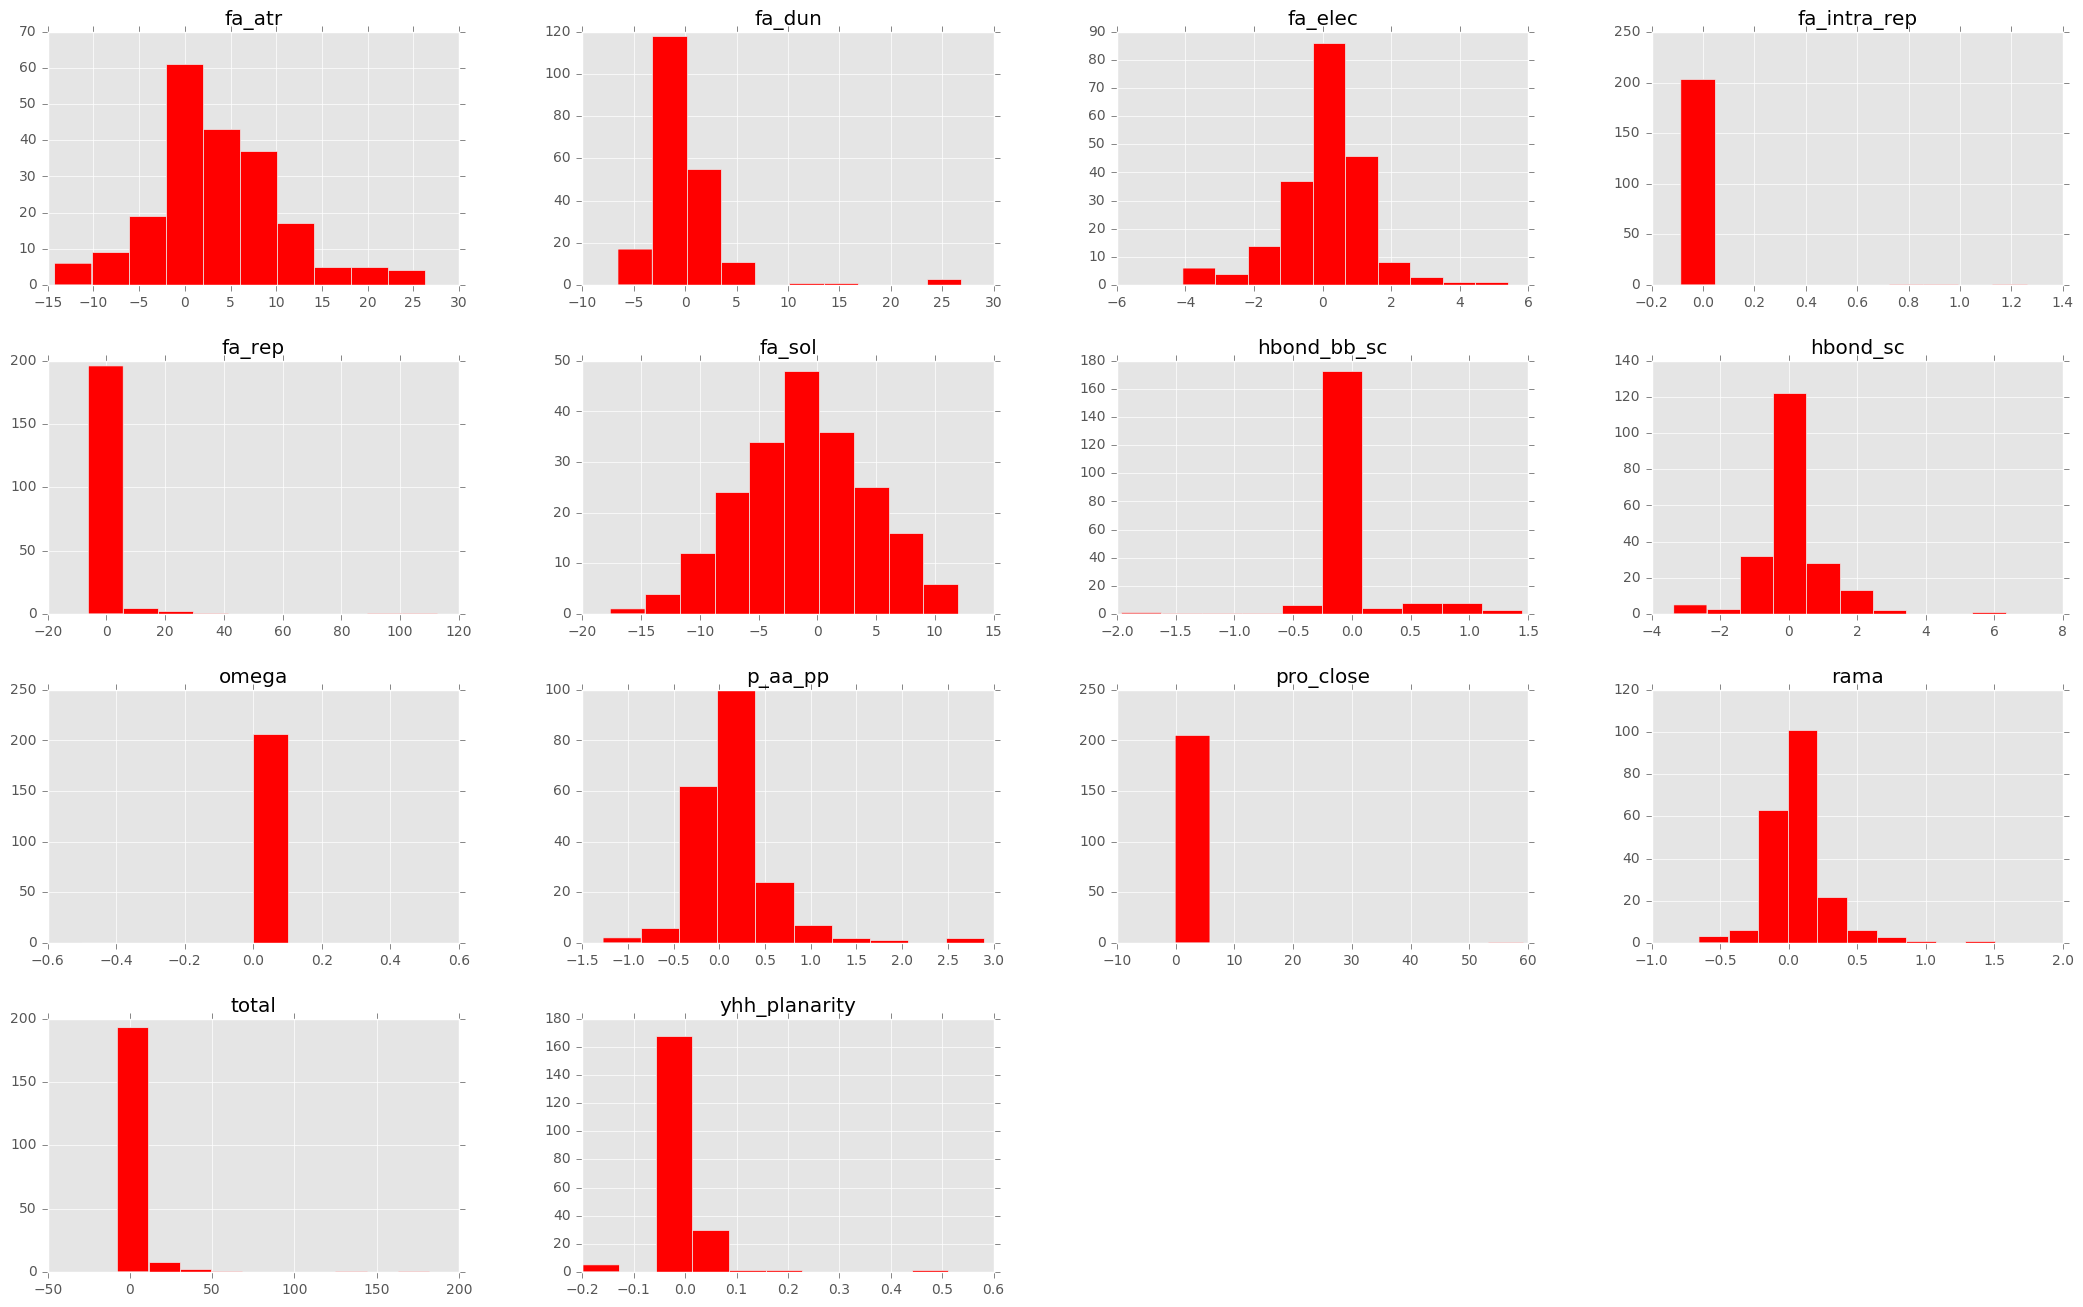

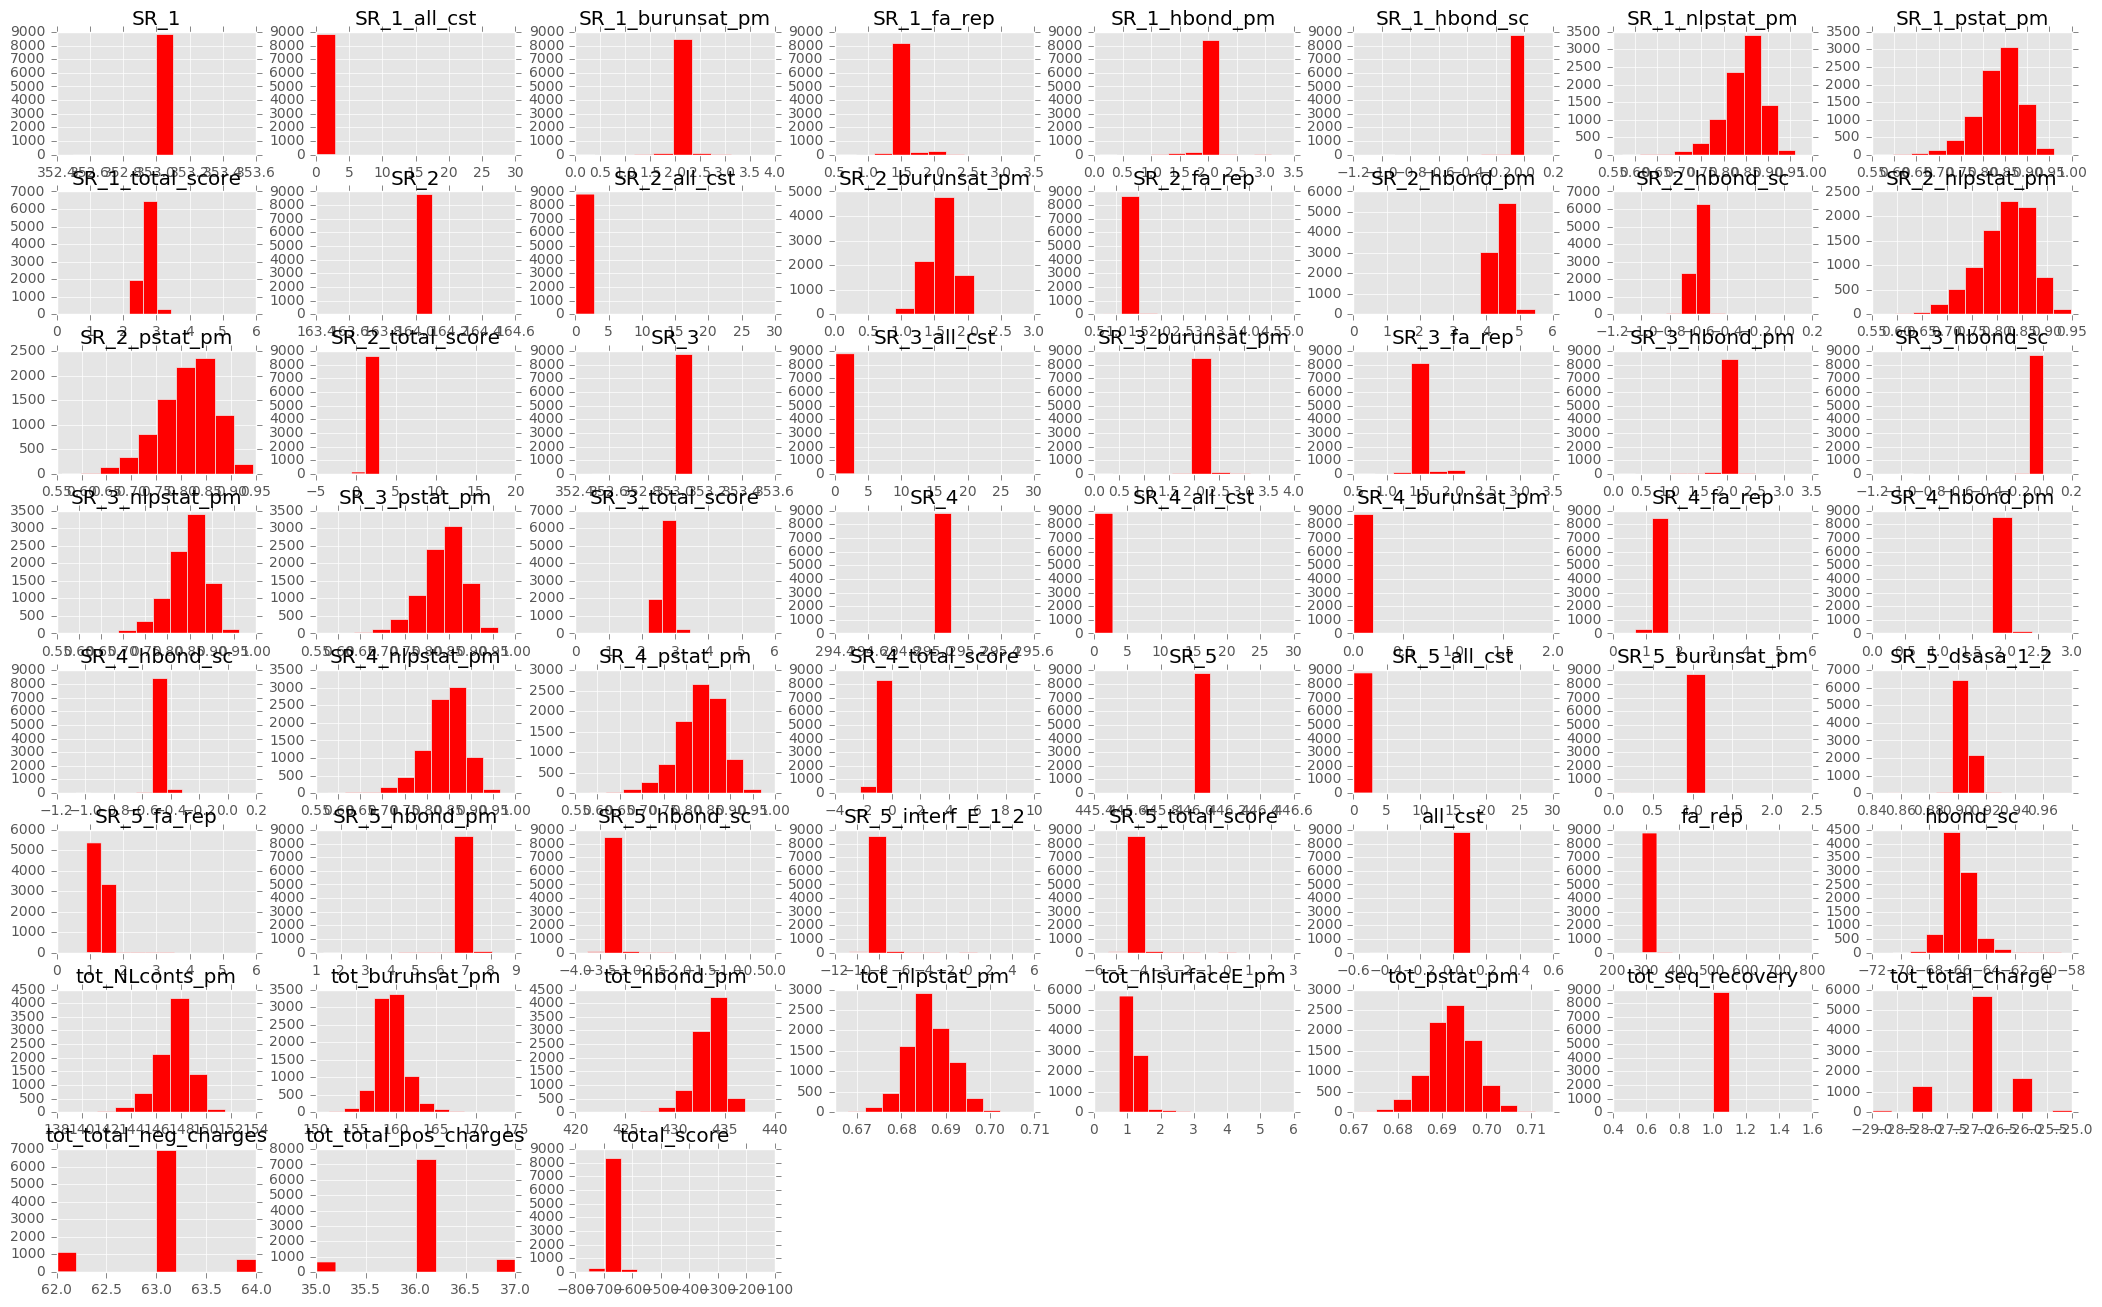

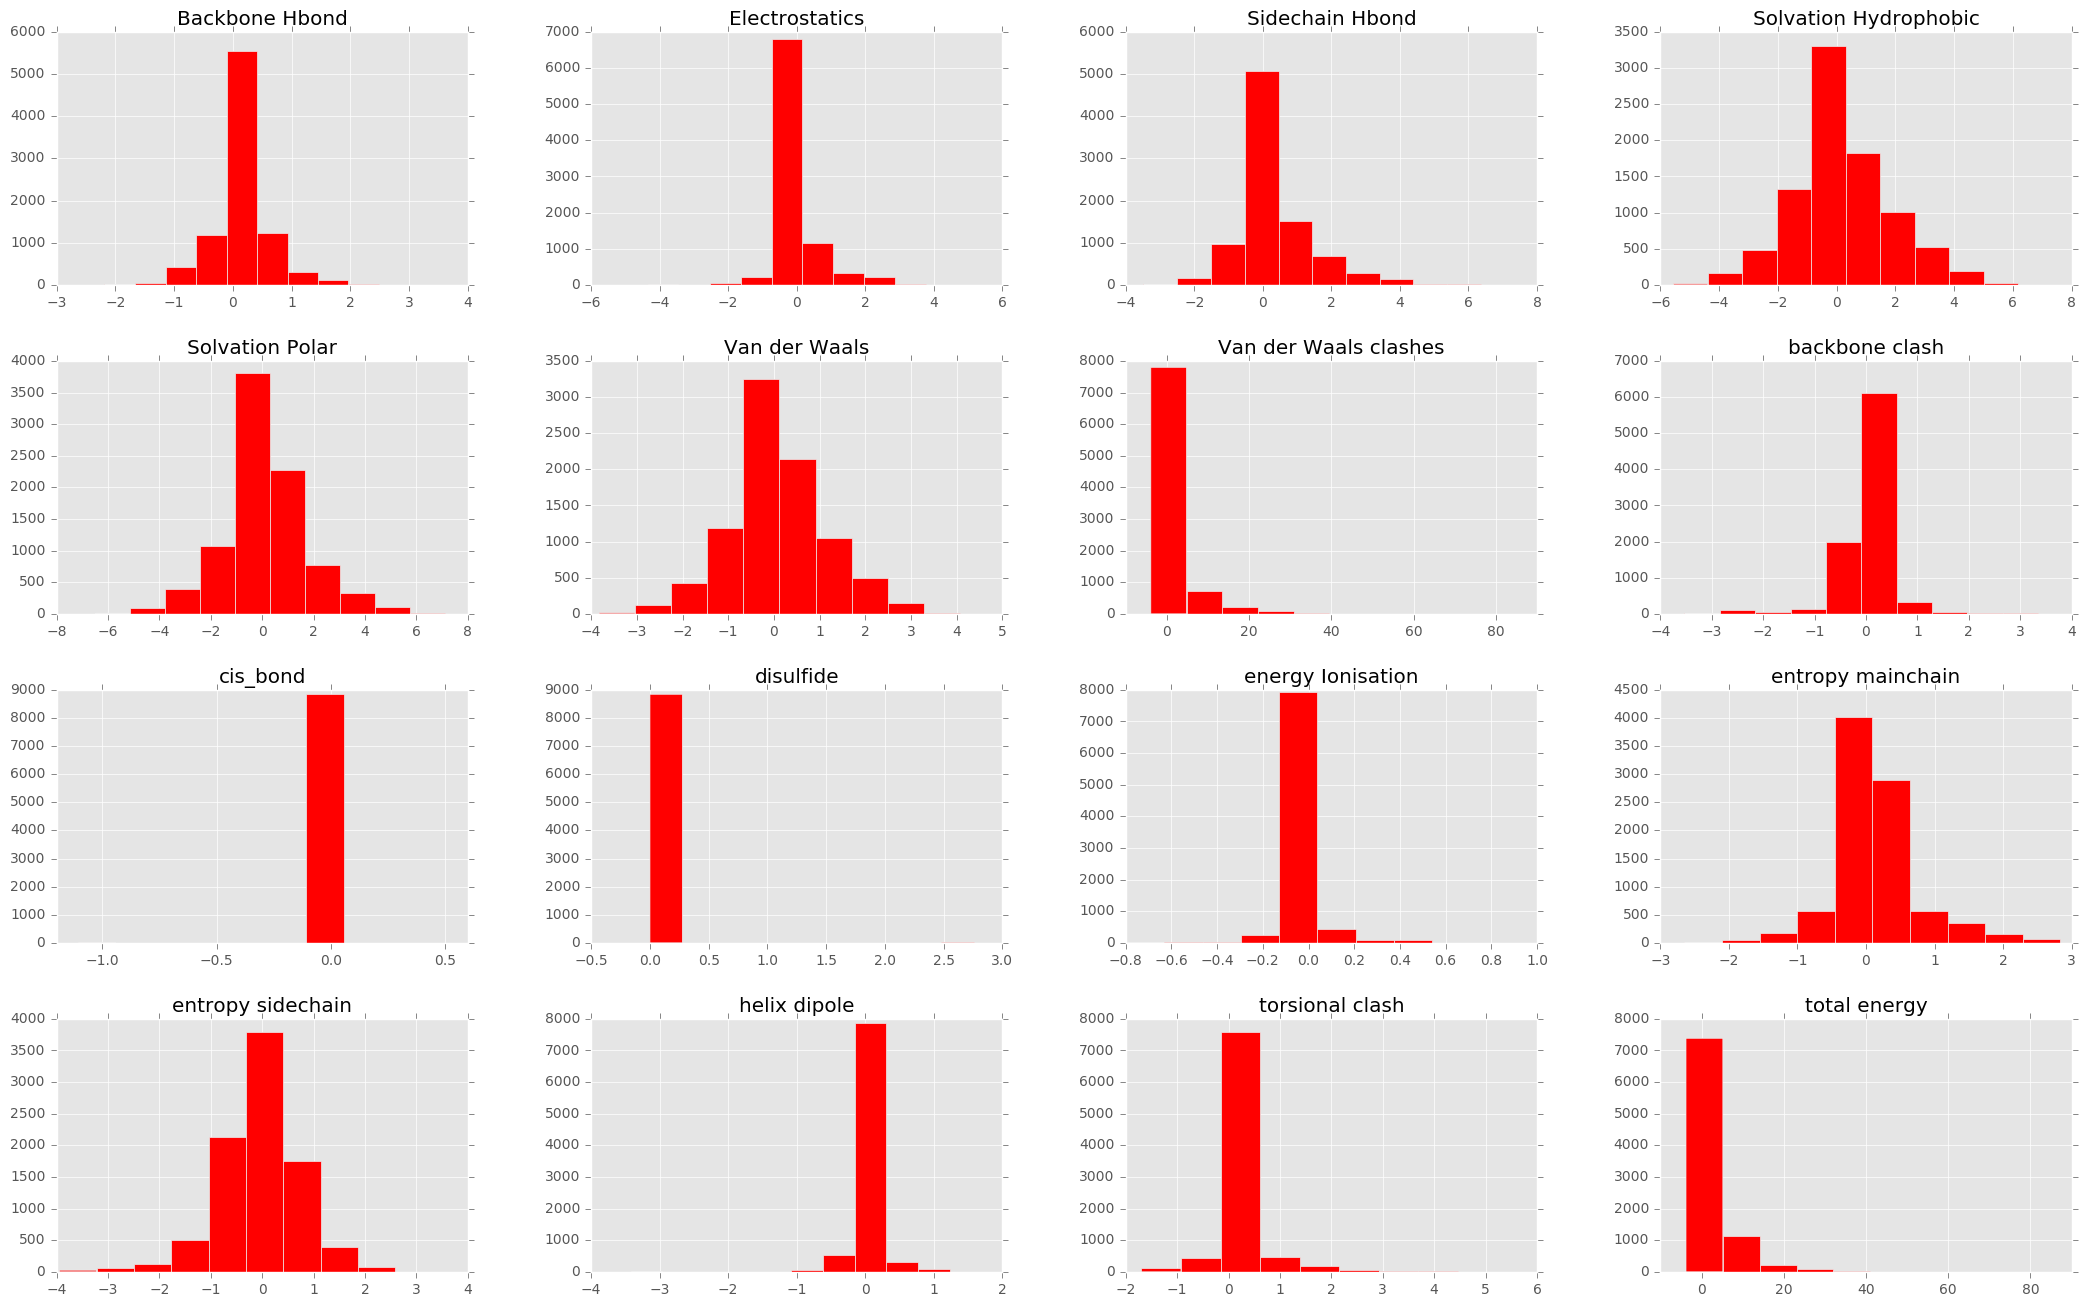

In [8]:
for feature_set in paths:
    feats = pandas.read_csv( feature_set, index_col=0 )
    nm = feature_set.split( '/' )[2]
    
    feats.hist( color='red', figsize=( 26, 16 ) ) 
    #plt.tight_layout()